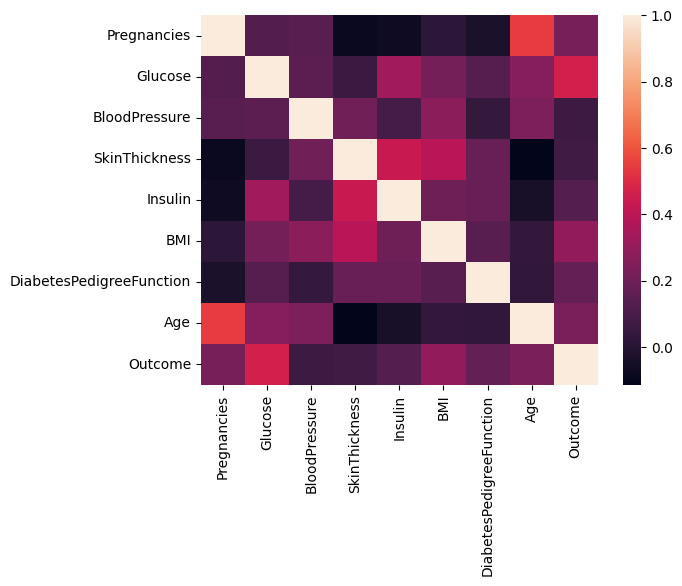

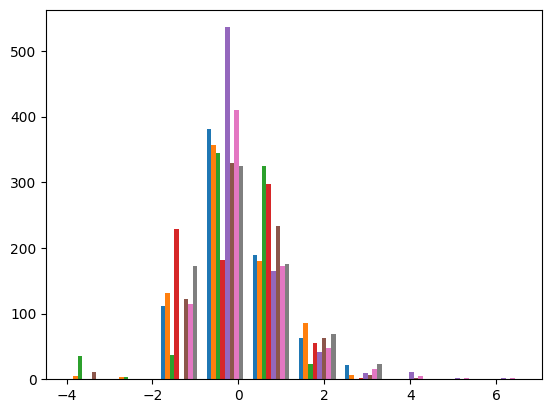

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
60     -0.547562 -1.153942      -3.570271      -1.287373 -0.692439 -4.057829   
618     1.529850 -0.278192       0.666184       0.217120 -0.692439 -0.481038   
346    -0.844335  0.566280      -1.193723      -0.096316  0.027772 -0.417619   
294    -1.141108  1.254369      -0.987066      -1.287373 -0.692439 -1.280108   
231     0.639530  0.409897       0.562856       1.032053  2.518140  1.802021   
..           ...       ...            ...            ...       ...       ...   
71      0.342757  0.566280      -0.263769       0.906679  0.522374 -0.430303   
106    -0.844335 -0.778620       2.732747      -1.287373 -0.692439 -1.216690   
270     1.826623 -0.622237       0.872840       1.032053 -0.692439  1.725919   
435    -1.141108  0.628834      -3.570271      -1.287373 -0.692439  1.320042   
102    -1.141108  0.128406       1.389481      -1.287373 -0.692439 -1.204006   

     DiabetesPedigreeFunction       Age

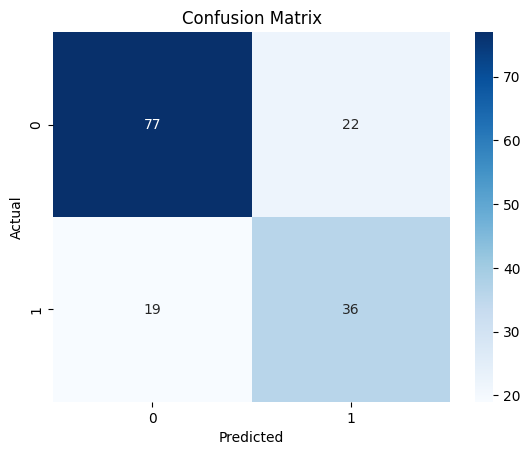

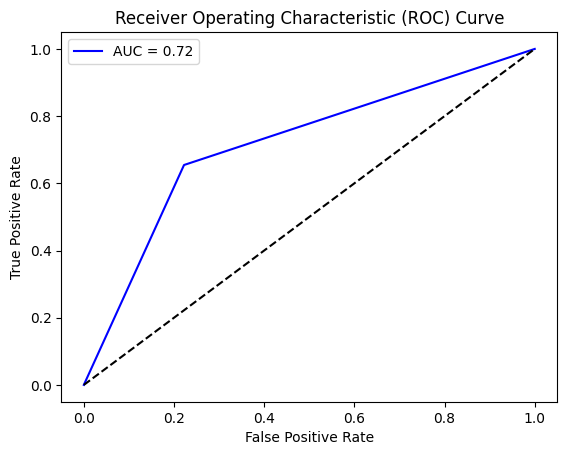

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639530  0.847771       0.149543       0.906679 -0.692439  0.203880   
1      -0.844335 -1.122665      -0.160441       0.530556 -0.692439 -0.683976   
2       1.233077  1.942458      -0.263769      -1.287373 -0.692439 -1.102537   
3      -0.844335 -0.997558      -0.160441       0.154433  0.123221 -0.493721   
4      -1.141108  0.503727      -1.503707       0.906679  0.765337  1.408828   
..           ...       ...            ...            ...       ...       ...   
763     1.826623 -0.622237       0.356200       1.721613  0.869464  0.115094   
764    -0.547562  0.034575       0.046215       0.405181 -0.692439  0.609757   
765     0.342757  0.003299       0.149543       0.154433  0.279412 -0.734711   
766    -0.844335  0.159683      -0.470426      -1.287373 -0.692439 -0.240048   
767    -0.844335 -0.872451       0.046215       0.655930 -0.692439 -0.201997   

     DiabetesPedigreeFunction       Age

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# Load the dataset into a pandas DataFrame
df = pd.read_csv('diabetes.csv')

#Correlation Matirx
sns.heatmap(df.corr(),annot=False)
plt.show()

# Separate the target variable from the features
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Impute NaN values using mean imputation
mean_value=X.mean()
X = X.fillna(value=mean_value, inplace=False)

# Scale the features
for column in X.keys():
    X[column] = (X[column] - X[column].mean()) / (X[column].std())

plt.hist(X)
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

# Initialize a random forest classifier with 100 trees ########################
rfc = RandomForestClassifier(n_estimators=25,  random_state=42)

#Training
rfc.fit(X_train, y_train)
YPrediction = rfc.predict(X_test) #prediction

################################################################################
#Accuracy
# Calculate the F1 score
f1 = f1_score(y_test, YPrediction, average='macro')
print(f"F1 score: {f1:.3f}")

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, YPrediction, pos_label=1)
AUC = roc_auc_score(y_test, YPrediction, multi_class='ovo')
print(f"AUC score: {AUC:.3f}")

# confusion matrix
matrix = confusion_matrix(y_test, YPrediction)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f'AUC = {AUC:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(X)